<a href="https://colab.research.google.com/github/fnbellomo/DiploDatos2021/blob/main/02_AnalisisYCuracion/AyCu_Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math

sns.set_context('talk')
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)

In [2]:
def is_one_to_one(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [3]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    Thanks https://stackoverflow.com/questions/42877802/pandas-dataframe-join-items-in-range-based-on-their-geo-coordinates-longitude
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [4]:
melb_df = pd.read_csv(
    "https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv",
    parse_dates=["Date"]
)

# Transformamos las col cat 'type' y 'method' a numericas
melb_df["seller_cat"] = LabelEncoder().fit_transform(melb_df.SellerG)
melb_df["method_cat"] = LabelEncoder().fit_transform(melb_df.Method)
melb_df["type_cat"] = LabelEncoder().fit_transform(melb_df.Type)
melb_df["suburb_cat"] = LabelEncoder().fit_transform(melb_df.Suburb)
melb_df["region_name_cat"] = LabelEncoder().fit_transform(melb_df.Regionname)
melb_df["council_area_cat"] = LabelEncoder().fit_transform(melb_df.CouncilArea.fillna('NaN'))

# Ordeno un poco las columnas y unifico los nombres a snake_cases
melb_df = melb_df[[
    "Date",
    "SellerG",
    "Method",
    "Type",
    "Regionname",
    "Suburb",
    "CouncilArea",
    "Address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "Postcode",
    "Lattitude",
    "Longtitude",
    "Distance",
    "Propertycount",
    "Price",
    "YearBuilt",
    "Landsize",
    "BuildingArea",
    "Rooms",
    "Bedroom2",
    "Bathroom",
    "Car",
]]

melb_df.columns = [
    "date",
    "seller",
    "method",
    "type",
    "region_name",
    "suburb",
    "council_area",
    "address",
    "seller_cat",
    "method_cat",
    "type_cat",
    "region_name_cat",
    "council_area_cat",
    "suburb_cat",
    "postcode",
    "lat",
    "lng",
    "distance",
    "property_count",
    "price",
    "year_built",
    "land_size",
    "building_area",
    "rooms",
    "bedroom_2",
    "bathroom",
    "car",
]

for col in ["postcode", "property_count", "bedroom_2", "bathroom"]:
    melb_df[col] = melb_df[col].astype(int)

melb_df.head()

,date,seller,method,type,region_name,suburb,council_area,address,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
0,2016-03-12,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,85 Turner St,23,1,0,2,32,0,3067,-37.7996,144.9984,2.5,4019,1480000.0,NaN,202.0,NaN,2,2,1,1.0
1,2016-04-02,Biggin,S,h,Northern Metropolitan,Abbotsford,Yarra,25 Bloomburg St,23,1,0,2,32,0,3067,-37.8079,144.9934,2.5,4019,1035000.0,1900.0,156.0,79.0,2,2,1,0.0
2,2017-04-03,Biggin,SP,h,Northern Metropolitan,Abbotsford,Yarra,5 Charles St,23,3,0,2,32,0,3067,-37.8093,144.9944,2.5,4019,1465000.0,1900.0,134.0,150.0,3,3,2,0.0
3,2017-04-03,Biggin,PI,h,Northern Metropolitan,Abbotsford,Yarra,40 Federation La,23,0,0,2,32,0,3067,-37.7969,144.9969,2.5,4019,850000.0,NaN,94.0,NaN,3,3,2,1.0
4,2016-04-06,Nelson,VB,h,Northern Metropolitan,Abbotsford,Yarra,55a Park St,155,4,0,2,32,0,3067,-37.8072,144.9941,2.5,4019,1600000.0,2014.0,120.0,142.0,4,3,1,2.0


In [5]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13580 non-null  datetime64[ns]
 1   seller            13580 non-null  object        
 2   method            13580 non-null  object        
 3   type              13580 non-null  object        
 4   region_name       13580 non-null  object        
 5   suburb            13580 non-null  object        
 6   council_area      12211 non-null  object        
 7   address           13580 non-null  object        
 8   seller_cat        13580 non-null  int64         
 9   method_cat        13580 non-null  int64         
 10  type_cat          13580 non-null  int64         
 11  region_name_cat   13580 non-null  int64         
 12  council_area_cat  13580 non-null  int64         
 13  suburb_cat        13580 non-null  int64         
 14  postcode          1358

In [6]:
melb_df.describe()

,seller_cat,method_cat,type_cat,region_name_cat,council_area_cat,suburb_cat,postcode,lat,lng,distance,property_count,price,year_built,land_size,building_area,rooms,bedroom_2,bathroom,car
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04,8205.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000,13518.000000
mean,130.810972,1.407290,0.526362,3.766053,15.890280,155.307953,3105.301915,-37.809203,144.995216,10.137776,7454.417378,1.075684e+06,1964.684217,558.416127,151.967650,2.937997,2.914728,1.534242,1.610075
std,77.735927,1.119105,0.832878,2.024334,9.970486,90.307844,90.676964,0.079260,0.103916,5.868725,4378.581772,6.393107e+05,37.273762,3990.669241,541.014538,0.955748,0.965921,0.691712,0.962634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,-38.182550,144.431810,0.000000,249.000000,8.500000e+04,1196.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1.000000,0.000000,2.000000,6.000000,70.000000,3044.000000,-37.856822,144.929600,6.100000,4380.000000,6.500000e+05,1940.000000,177.000000,93.000000,2.000000,2.000000,1.000000,1.000000
50%,135.000000,1.000000,0.000000,5.000000,18.000000,154.000000,3084.000000,-37.802355,145.000100,9.200000,6555.000000,9.030000e+05,1970.000000,440.000000,126.000000,3.000000,3.000000,1.000000,2.000000
75%,194.000000,1.000000,1.000000,5.000000,24.000000,234.000000,3148.000000,-37.756400,145.058305,13.000000,10331.000000,1.330000e+06,1999.000000,651.000000,174.000000,3.000000,3.000000,2.000000,2.000000
max,267.000000,4.000000,2.000000,7.000000,33.000000,313.000000,3977.000000,-37.408530,145.526350,48.100000,21650.000000,9.000000e+06,2018.000000,433014.000000,44515.000000,10.000000,20.000000,8.000000,10.000000


Eliminar valores extremos de:

    - year_built
    - land_size
    - building_area    

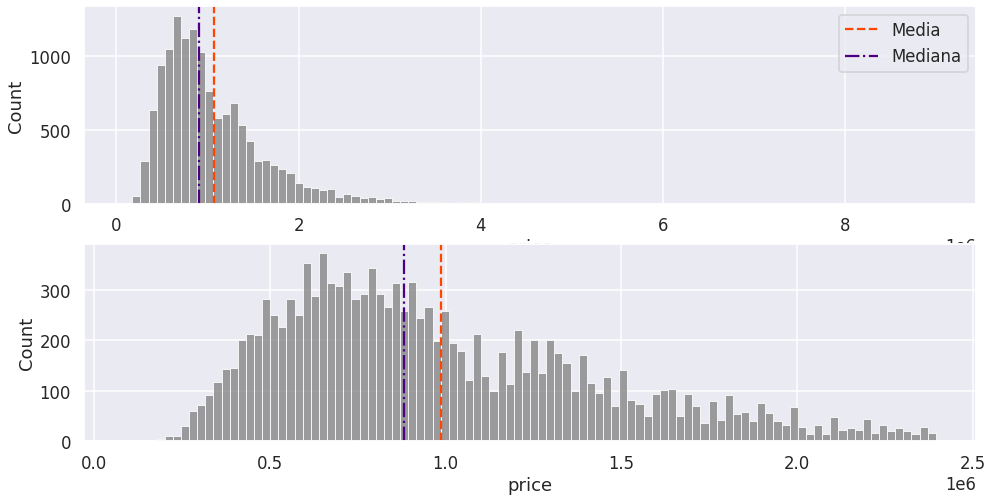

In [7]:
# Estos histogramas me dan algo de info visual, pero no me dicen mucho de los valores extremos...
import seaborn
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(melb_df["price"], bins=100, ax=axes[0], color='gray')
axes[0].axvline(melb_df["price"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(melb_df["price"].median(), color='indigo',
            linestyle='-.', label='Mediana')

melb_filtered_df = melb_df[melb_df["price"] < 2.4e6]
seaborn.histplot(melb_filtered_df["price"], bins=100, ax=axes[1], color='gray')
axes[1].axvline(melb_filtered_df["price"].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(melb_filtered_df["price"].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].legend()

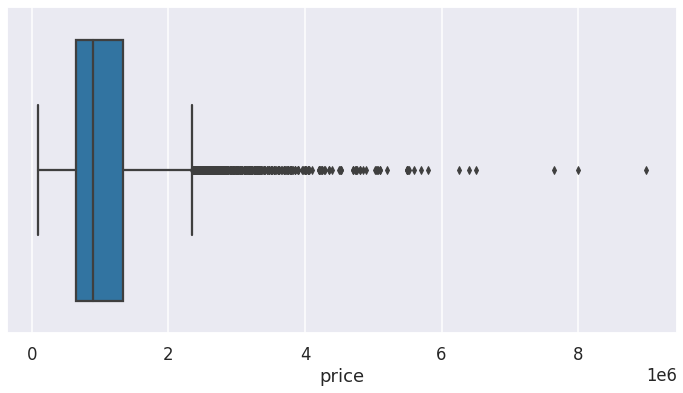

In [8]:
plt.figure(figsize=(12,6))
seaborn.boxplot(x=melb_df["price"])
# Acá se ven un poquito mejor los outliers, en la cola de atrás. Hay que definir dónde cortamos, si es que cortamos

In [9]:
melb_df[melb_df.price > 4e6].shape
#Convengamos que son sólo unas 55 casas de valores super altos

(55, 27)

In [10]:
melb_df["price"].quantile([.95, .98, .99, .995, .998])

0.950    2290050.0
0.980    2865360.0
0.990    3338150.0
0.995    3900000.0
0.998    4747630.0
Name: price, dtype: float64

In [11]:
melb_df[melb_df.price > 2.29e6].shape

(679, 27)

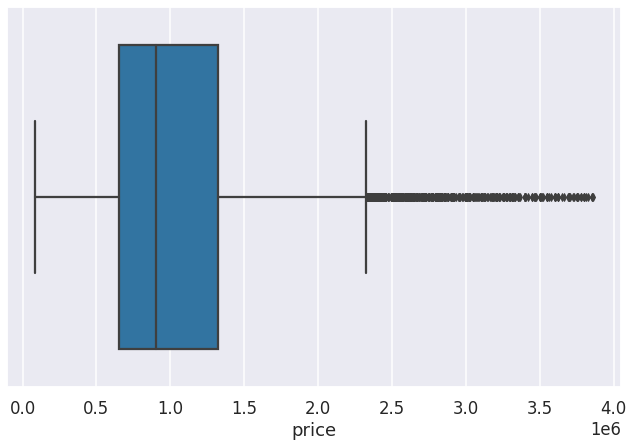

In [12]:
#El percentil .995 que me deja afuera los valores de venta de 3.9 millones para arriba
plt.figure(figsize=(11,7))
max_limit = melb_df["price"].quantile(.995)
seaborn.boxplot(x = melb_df[melb_df["price"] < max_limit]["price"])
#Sigue quedando una colita de valores fuera del quartil 3.... 

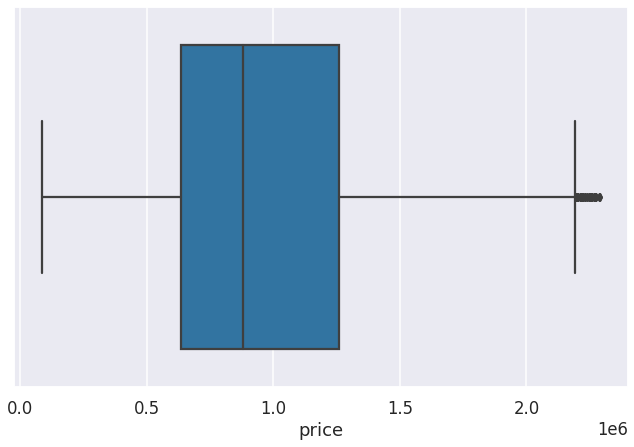

In [13]:
plt.figure(figsize=(11,7))
max_limit2 = melb_df.price.quantile(.95)
seaborn.boxplot(x = melb_df[melb_df["price"] < max_limit2]["price"])

In [14]:
# Esta es la decisión más conservadora

melb_df = melb_df[melb_df.price < 3900000]

In [15]:
melb_df.shape

(13510, 27)

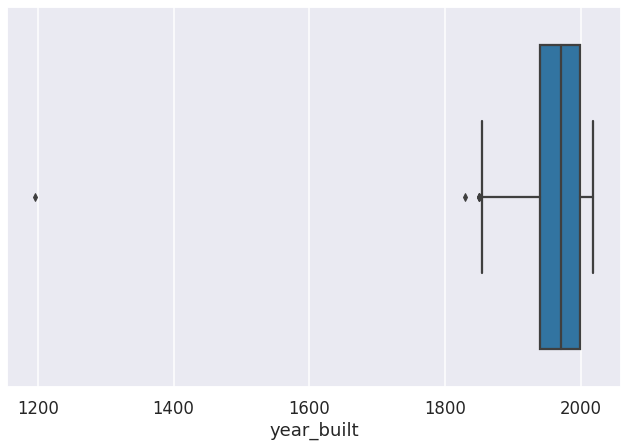

In [16]:
# YEAR BUILT
# Removimos dos casas que hacían ruido en los datos: una casa de 1196 y una de 1830.
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.year_built)

In [17]:
melb_df[melb_df.year_built < 1850].value_counts()

date        seller   method  type  region_name            suburb          council_area  address         seller_cat  method_cat  type_cat  region_name_cat  council_area_cat  suburb_cat  postcode  lat        lng        distance  property_count  price      year_built  land_size  building_area  rooms  bedroom_2  bathroom  car
2017-06-24  McGrath  VB      h     Eastern Metropolitan   Mount Waverley  Monash        5 Armstrong St  140         4           0         0                20                207         3149      -37.86788  145.12121  14.2      13366           1200000.0  1196.0      807.0      117.0          3      3          1         4.0    1
2016-03-09  Nelson   S       u     Northern Metropolitan  Collingwood     Yarra         2/79 Oxford St  155         1           2         2                32                82          3066      -37.80420  144.98450  1.6       4553            855000.0   1830.0      2886.0     122.0          2      2          1         1.0    1
dtype: int64

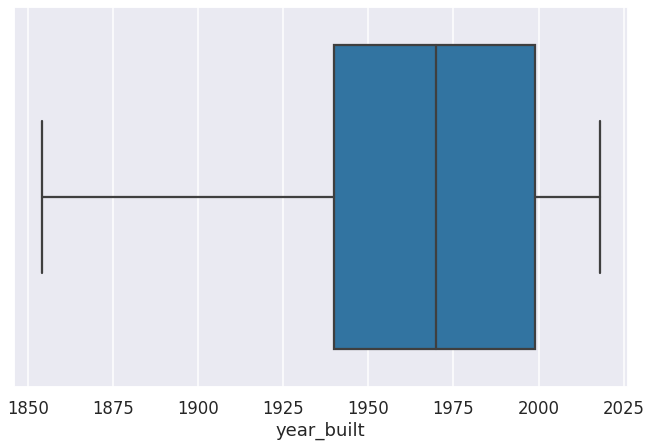

In [18]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["year_built"] > 1850]["year_built"])

In [19]:
melb_df = melb_df[(melb_df.year_built != 1196) & (melb_df.year_built != 1830)]

In [20]:
melb_df.shape

(13508, 27)

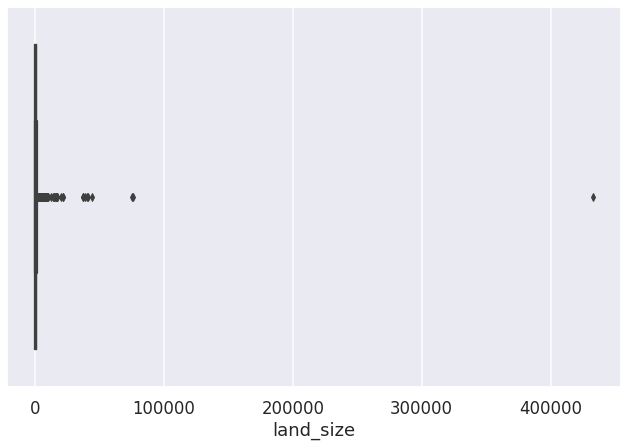

In [21]:
# LAND SIZE
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.land_size)

In [22]:
melb_df.land_size.quantile([.95, .98, .995, .998])

0.950     990.000
0.980    1767.440
0.995    4698.530
0.998    9404.062
Name: land_size, dtype: float64

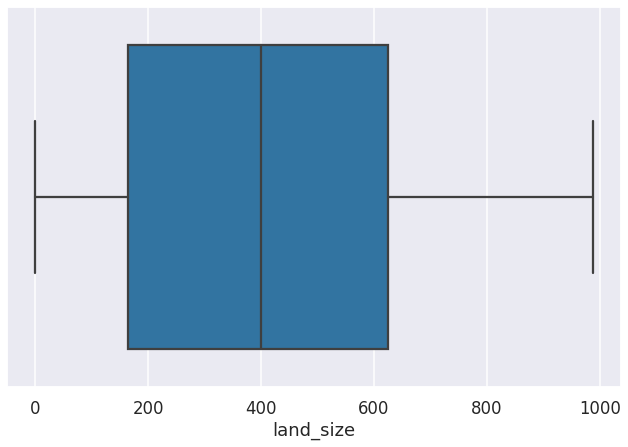

In [23]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["land_size"] < 990]["land_size"])

In [24]:
melb_df = melb_df[(melb_df.land_size < 900) | (melb_df.land_size.isna())]

In [25]:
melb_df.shape

(12626, 27)

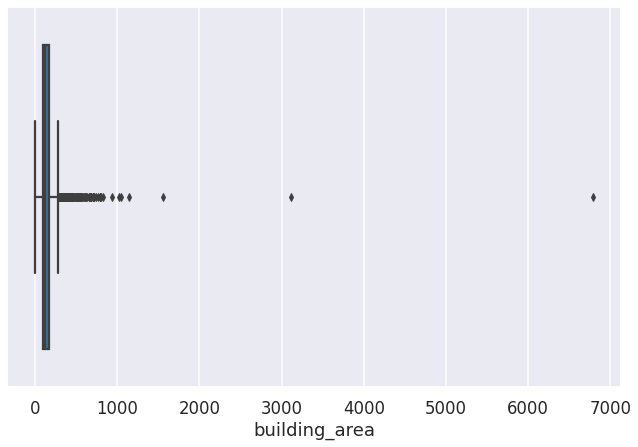

In [26]:
# BUILDING AREA
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df.building_area)

In [27]:
melb_df.building_area.quantile([.95, .98, .995, .998])

0.950    282.000
0.980    356.700
0.995    570.125
0.998    719.670
Name: building_area, dtype: float64

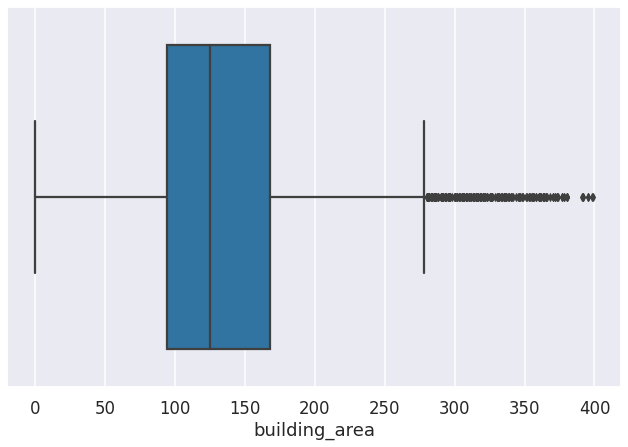

In [28]:
plt.figure(figsize=(11,7))
seaborn.boxplot(x = melb_df[melb_df["building_area"] < 400]["building_area"])

In [29]:
melb_df = melb_df[(melb_df.building_area < 400) | (melb_df.building_area.isna())]

In [30]:
melb_df.shape

(12536, 27)

2. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
    1. Justificar cada columna no seleccionada.
    2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

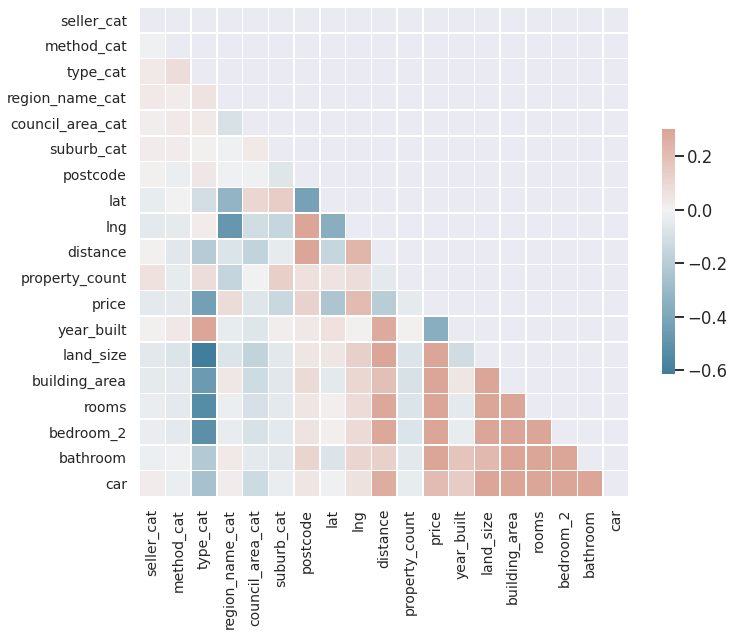

In [31]:
# Matriz de correlation de las variables numericas
corr = melb_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize = 14)

In [32]:
# Un postcode puede ser de varios suburbuios. En cambio, cada suburbio tiene uno y solo un postcode.
# Nos quedamos con los postcode que son más especificos
melb_df.groupby("suburb")["postcode"].nunique().max(), melb_df.groupby("postcode")["suburb"].nunique().max()

(1, 5)

In [33]:
# Hay 268 vendedores/inmobiliarias en todo el DataSet. De estos 268, el 66% tiene muy pocas ventas, y el 30% sólamente 1 venta
vendedores = len(melb_df.seller.unique())
vendedores_con_pocas_ventas = sum(melb_df.groupby('seller')['seller'].count() < 2)
print('Vendedores:', vendedores, '\nPorcentaje con n menor a 1:', f'{vendedores_con_pocas_ventas*100/vendedores:.2f}%')
vendedores_con_pocas_ventas = sum(melb_df.groupby('seller')['seller'].count() < 10)
print('Porcentaje con n menor a 10:', f'{vendedores_con_pocas_ventas*100/vendedores:.2f}%')

Vendedores: 261 
Porcentaje con n menor a 1: 29.89%
Porcentaje con n menor a 10: 67.82%


In [34]:
drop_cols = [
    "date", # esos años tuvieron solo 2% de inflación por lo que no cambia el precio 
    #Se debe tener en cuenta que el dataset está concentrado en pocos vendedores con muchas ventas
    #, y el 66% de los vendedores tiene muy pocas ventas como para analizar
    "seller", # Por esto, no nos interesa analizar la influencia de una inmobiliaria en el precio. 
    "seller_cat", #va de la mano con seller
    "method", #Tampoco analizaremos la influencia (si existe) del método de venta en el precio final del inmueble
    "method_cat", #va de la mano con method
    
    #Consideramos que el precio de un inmueble depende mucho de su ubicación 
    #(existe una frase americana que indica, los 3 factores que más influencian son: Location, Location, Location
    #Debido a esto, utilizaremos el indicador más preciso posible respecto a la zona de ubicación del inmueble
    #En este dataset, el agrupador por zona más preciso es suburb. Por eso, dropearemos las demás columnas que dan info geográfica: 
    "region_name", 
    "region_name_cat", 
    "council_area", 
    "council_area_cat",
    "postcode",
    "address",
    "property_count", # Esto depende del suburb y la info queda repetida
    "bedroom_2", # Coincide en más de un 90% con la col "rooms" y el segundo viene de un scraper
]

cols = [c for c in melb_df.columns if c not in drop_cols]
melb_df = melb_df[cols]
melb_df.head()

,type,suburb,type_cat,suburb_cat,lat,lng,distance,price,year_built,land_size,building_area,rooms,bathroom,car
0,h,Abbotsford,0,0,-37.7996,144.9984,2.5,1480000.0,NaN,202.0,NaN,2,1,1.0
1,h,Abbotsford,0,0,-37.8079,144.9934,2.5,1035000.0,1900.0,156.0,79.0,2,1,0.0
2,h,Abbotsford,0,0,-37.8093,144.9944,2.5,1465000.0,1900.0,134.0,150.0,3,2,0.0
3,h,Abbotsford,0,0,-37.7969,144.9969,2.5,850000.0,NaN,94.0,NaN,3,2,1.0
4,h,Abbotsford,0,0,-37.8072,144.9941,2.5,1600000.0,2014.0,120.0,142.0,4,1,2.0


In [35]:
melb_df.groupby("type")["type"].count()

type
h    8824
t    1082
u    2630
Name: type, dtype: int64

In [36]:
melb_df.groupby("suburb")["suburb"].count().sort_values()

suburb
Croydon South       1
Hurstbridge         1
Brookfield          1
Yarra Glen          1
Deepdene            1
                 ... 
Brunswick         211
Preston           231
Richmond          237
Bentleigh East    244
Reservoir         337
Name: suburb, Length: 303, dtype: int64

`type` tiene una "buena" cantidad por categoria, pero `suburb` no. Vamos a tener que agrupar

In [37]:
#Se crea una nueva columna en la que se agruparán los suburbios con bajo "n"
melb_df['suburb_grouped'] = melb_df.suburb

In [38]:
min_points_per_suburb = 5 #DEFINE LA MÍNIMA CANTIDAD QUE ACEPTAMOS POR SUBURBIO
suburb_to_group = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb_grouped[0] 
current_count = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb[0]

def nearest_suburb(lat_to_group, lng_to_group, original_suburb, df):
  df2 = df[df['suburb_grouped'] != original_suburb].copy()
  df2['dist'] = df2.apply(lambda row: haversine_np(lat_to_group, lng_to_group, row.lat, row.lng), axis=1)
  nearest_suburb = df2.sort_values('dist', ascending=True).suburb_grouped.values[0]
  del df2
  return nearest_suburb

while current_count < min_points_per_suburb:
  lat_to_group = melb_df[melb_df.suburb_grouped == suburb_to_group].lat.values[0]
  lng_to_group = melb_df[melb_df.suburb_grouped == suburb_to_group].lng.values[0]
  destiny_suburb = nearest_suburb(lat_to_group, lng_to_group, suburb_to_group, melb_df)
  melb_df['suburb_grouped'].replace({suburb_to_group:destiny_suburb}, inplace=True)
  print(suburb_to_group, '-->', destiny_suburb)
  suburb_to_group = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb_grouped[0] 
  current_count = melb_df.groupby("suburb_grouped")["suburb"].count().sort_values().reset_index().suburb[0]
  
melb_df.groupby("suburb_grouped")["suburb_grouped"].count().sort_values()


Croydon South --> Croydon
Wallan --> Craigieburn
Yarra Glen --> Mooroolbark
Deepdene --> Balwyn
Officer --> Pakenham
Plumpton --> Caroline Springs
Hurstbridge --> Diamond Creek
Brookfield --> Melton West
Attwood --> Westmeadows
St Helena --> Greensborough
Beaconsfield --> Berwick
Sandhurst --> Carrum Downs
Healesville --> Mooroolbark
Warrandyte --> Doncaster East
Rockbank --> Caroline Springs
Chirnside Park --> Mooroolbark
Bacchus Marsh --> Melton West
Wonga Park --> Croydon North
Montrose --> Kilsyth
Williams Landing --> Truganina
Cranbourne North --> Berwick
Keilor Lodge --> Taylors Lakes
Gisborne --> Sunbury
Diggers Rest --> Sunbury
Kooyong --> Toorak
Waterways --> Aspendale Gardens
Burnside --> Deer Park
The Basin --> Boronia
Skye --> Carrum Downs
Knoxfield --> Wantirna South
Docklands --> West Melbourne
Notting Hill --> Glen Waverley
Springvale South --> Keysborough
Clarinda --> Oakleigh South
Burnside Heights --> Delahey
Pakenham --> Berwick
Cranbourne --> Berwick
Seabrook --> Al

suburb_grouped
Kings Park          5
Croydon North       5
Derrimut            5
Lower Plenty        5
Princes Hill        5
                 ... 
Brunswick         211
Preston           231
Richmond          237
Bentleigh East    244
Reservoir         337
Name: suburb_grouped, Length: 251, dtype: int64

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
     1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
     2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
     3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [39]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
    'description', 'neighborhood_overview', 'transit',
    'street', 'neighborhood', 'city', 'suburb',
    'state', 'zipcode', 'latitude', 'longitude',
    'price', 'weekly_price', 'monthly_price',
    'review_scores_location',
]
airbnb_df = pd.read_csv(
     'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
#    "./data/cleansed_listings_dec18.csv",
    usecols=interesting_cols,
    low_memory=False,
)

airbnb_df.zipcode = pd.to_numeric(airbnb_df.zipcode, errors="coerce").fillna(0).astype(int)
airbnb_df.head()

,description,neighborhood_overview,transit,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"YES ! The bus (305,309) is exactly two blocks ...","Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN,9.0
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,Easy transport options - the tram is right out...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0,9.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,Our apartment is located within walking distan...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0,9.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...",Public transport is super convenient with a ch...,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0,9.0
4,We offer comfortable accommodation in Inner Me...,NaN,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0,10.0


In [40]:
airbnb_df = airbnb_df[(airbnb_df.price > 0) & (airbnb_df.price < 300)]
airbnb_df.describe()

,zipcode,latitude,longitude,price,weekly_price,monthly_price,review_scores_location
count,21208.000000,21208.000000,21208.000000,21208.000000,2344.000000,1770.000000,16111.000000
mean,3093.283808,-37.826531,145.006039,115.449217,773.859642,2855.162147,9.711067
std,355.606947,0.065847,0.123844,60.431877,498.280034,1992.065571,0.696182
min,0.000000,-38.224427,144.484326,1.000000,91.000000,400.000000,2.000000
25%,3006.000000,-37.852257,144.957315,68.000000,430.000000,1600.000000,10.000000
50%,3067.000000,-37.817196,144.978060,105.000000,700.000000,2600.000000,10.000000
75%,3160.000000,-37.802800,145.012660,150.000000,1000.000000,3648.000000,10.000000
max,30122.000000,-37.486284,145.839127,299.000000,9899.000000,54258.000000,10.000000


In [41]:
suburb_melb = set(melb_df.suburb.tolist())
suburb_airbnb = set(airbnb_df.suburb.tolist())

print(f"Total de suburb en melb: {len(suburb_melb)}")
print(f"Total de suburb intersección: {len(suburb_melb.intersection(suburb_airbnb))}")
print(f"suburb que no están en airbnb: {suburb_melb.difference(suburb_airbnb)}")

Total de suburb en melb: 303
Total de suburb intersección: 288
suburb que no están en airbnb: {'Croydon Hills', 'Wallan', 'Deepdene', 'Taylors Lakes', 'Campbellfield', 'Gisborne', 'Ardeer', 'Coolaroo', 'Strathmore Heights', 'Yallambie', 'Skye', 'St Helena', 'Bacchus Marsh', 'Melton', 'St Albans'}


In [42]:
len(melb_df)

12536

In [43]:
# Agrupo los airbnb que están a 1, 2.5 o 5 km de distancia del anuncio
# Y calculo algunos valores
# Esto toma un tiempo así anda por el mate

results = []
length = len(melb_df)
for i, row in melb_df.iterrows():
    if i % 100 == 0:
        print(f"\rProcesando fila: {i} de {length}", end="")

    airbnb_df["dist"] = haversine_np(airbnb_df.latitude, airbnb_df.longitude, row.lat, row.lng)

    result = {
        "lat": row.lat,
        "lng": row.lng,
    }

    for d in [1, 2, 2.5]:
        d = airbnb_df[airbnb_df.dist < d] \
            .agg({"dist": "count", "price": "mean", "review_scores_location": "mean"}) \
            .rename({"dist": f"count_{d}km", "price": f"price_mean_{d}km", "review_scores_location": f"review_mean_{d}km"})

        result = {**result, **d}
    results.append(result)

Procesando fila: 13500 de 12536

In [44]:
results = pd.DataFrame(results)
results.head()


,lat,lng,count_1km,price_mean_1km,review_mean_1km,count_2km,price_mean_2km,review_mean_2km,count_2.5km,price_mean_2.5km,review_mean_2.5km
0,-37.7996,144.9984,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208
1,-37.8079,144.9934,424.0,123.297170,9.785311,1449.0,122.149068,9.852740,2002.0,122.017483,9.854309
2,-37.8093,144.9944,388.0,118.878866,9.786834,1389.0,122.575954,9.850401,2028.0,122.054241,9.845728
3,-37.7969,144.9969,203.0,121.965517,9.674699,1150.0,119.034783,9.822079,1826.0,118.261227,9.846995
4,-37.8072,144.9941,398.0,121.683417,9.763636,1421.0,122.434201,9.849913,1942.0,121.684346,9.859615


In [45]:
melb_df = melb_df.merge(results.drop_duplicates(subset=['lat', 'lng']), how='left', on=["lat", "lng"])


In [46]:
melb_df.groupby("count_1km")["count_1km"].count().sort_values()

count_1km
3920.0      1
680.0       1
681.0       1
686.0       1
687.0       1
         ... 
10.0      273
6.0       290
5.0       290
18.0      290
4.0       320
Name: count_1km, Length: 871, dtype: int64

:up: Vamos a tener que imputar algunos valores

Teniendo la lat y lng de cada casa, podemos usar la api de open streen map para buscar información relevante en la cercania de las propiedades como:
- Escuelas
- Plazas
- Supermercados

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



- Imputar la cantidad de baños considerando la cantidad de habitaciones y el sub
- Imputar el tamaño del terreno segun la cantidad de habitaciones, baños y sub

In [47]:
melb_df.head(1)

,type,suburb,type_cat,suburb_cat,lat,lng,distance,price,year_built,land_size,building_area,rooms,bathroom,car,suburb_grouped,count_1km,price_mean_1km,review_mean_1km,count_2km,price_mean_2km,review_mean_2km,count_2.5km,price_mean_2.5km,review_mean_2.5km
0,h,Abbotsford,0,0,-37.7996,144.9984,2.5,1480000.0,NaN,202.0,NaN,2,1,1.0,Abbotsford,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208


In [48]:
#Volvemos a traer CouncilArea
original = pd.read_csv("https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv", usecols=['CouncilArea',"Lattitude","Longtitude"])
melb_df = melb_df.merge(original.rename(columns={'CouncilArea':'council_area', 'Lattitude':'lat', 'Longtitude':'lng'}), 
                        how='left', left_index=True, right_index=True)
melb_df.head(1)

,type,suburb,type_cat,suburb_cat,lat_x,lng_x,distance,price,year_built,land_size,building_area,rooms,bathroom,car,suburb_grouped,count_1km,price_mean_1km,review_mean_1km,count_2km,price_mean_2km,review_mean_2km,count_2.5km,price_mean_2.5km,review_mean_2.5km,council_area,lat_y,lng_y
0,h,Abbotsford,0,0,-37.7996,144.9984,2.5,1480000.0,NaN,202.0,NaN,2,1,1.0,Abbotsford,205.0,115.312195,9.652941,1146.0,120.191972,9.821814,1799.0,119.989994,9.850208,Yarra,-37.7996,144.9984


In [49]:
#Hay 325 valores NaN en council_area
sum(melb_df.council_area.isna())

325

In [50]:
#Se imputará el Council Area por la moda del suburb.
#Se crea un dict que contiene key-values del tipo: suburb-moda_de_council_para_ese_suburb
suburb_council_mode = { sub: melb_df[melb_df.suburb_grouped == sub]['council_area'].mode(1).values[0] for sub in melb_df.suburb_grouped.unique()}

In [51]:
melb_df['council_area'] = melb_df.apply(lambda row: suburb_council_mode[row.suburb_grouped] 
                        if type(row.council_area) != str else row['council_area'],axis=1)

Imputar la cantidad de baños considerando la cantidad de habitaciones y el sub

In [52]:
sum(melb_df.bathroom == 0)

33

In [53]:
#Existen 33 propiedades con 0 baños. Se considera imposible, y se imputará
#con el floor del promedio de baños para casas de ese suburbio con la misma cantidad de rooms
#si no hay casas en el suburbio con la misma cantidad de rooms, se tomará el promedio del suburbio
def imputar_inodoros(row):
  if row.bathroom == 0:
    suburb_df = melb_df[(melb_df.bathroom > 0) & (melb_df.rooms == row.rooms) & melb_df.suburb_grouped == row.suburb_grouped]
    if len(suburb_df) > 0:
      return math.floor(suburb_df.bathroom.mean())
    else:
      suburb_df = melb_df[(melb_df.bathroom > 0) & melb_df.suburb_grouped == row.suburb_grouped]
      if len(suburb_df) > 0:
        return math.floor(suburb_df.bathroom.mean())
      else:
        return 1
  else:
    return row.bathroom

melb_df['bathroom'] = melb_df.apply(imputar_inodoros, axis=1)


Imputar el tamaño del terreno segun la cantidad de habitaciones, baños y sub

In [54]:
#Se imputa el promedio del tamaño de terreno del suburbio
#En caso de que no haya ningun terreno en el suburbio con landisze > 0, se imputa el promedio del dataset.

def imputar_landsize(row):
  if row.land_size == 0:
    suburb_df = melb_df[(melb_df.land_size > 0) & melb_df.suburb_grouped == row.suburb_grouped]
    if len(suburb_df) > 0:
      return suburb_df.land_size.mean()
    else:
      return melb_df[(melb_df.land_size > 0)].land_size.mean()
  else:
    return row.land_size

melb_df['land_size'] = melb_df.apply(imputar_landsize, axis=1)


## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [60]:
use_cols = ['type', 'lat_x', 'lng_x',
       'distance', 'price', 'year_built', 'land_size', 'building_area',
       'rooms', 'bathroom', 'car', 'suburb_grouped', 'count_1km',
       'price_mean_1km', 'review_mean_1km', 'count_2km', 'price_mean_2km',
       'review_mean_2km', 'count_2.5km', 'price_mean_2.5km',
       'review_mean_2.5km', 'council_area']
melb_df = melb_df[use_cols].rename(columns={'lat_x':'lat', 'lng_x':'lng'})

In [62]:
melb_df.to_csv('melb_df_processed.csv', index=False)